In [7]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
def tester(a):
    if (a%2) == 0:
        return 1
    else:
        return 0

In [10]:
tester(4)

1

In [27]:
names = []

# colours = ['#ebe831', '#ffac32', '#ff7259', '#e14a7c', '#9e4091', '#433f8c']
colours = ['#ebe831', '#ffae2f', '#ff725c', '#fd468b', '#b944b1', '#4250bd']
leg_labels = ['10$^1$K', '10$^2$K', '10$^3$K', '10$^4$K', '10$^5$K', '10$^6$K']

for i in range(11)[1:]:
    names.append(str(i))

def ann_plots():

    fig, ax1 = plt.subplots(figsize = (8,10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 200)
    fig.subplots_adjust(hspace=0, wspace=0)
    
    m=0
    for j in names:
        
        data = pd.read_csv('d' + j + 'ACS.dat', sep="\t", header = None)

        for i in range(len(data.columns))[1:]:
            ax1[m,tester(int(j)-1)].loglog(data[0], data[i], color = colours[i-1], label = leg_labels[i-1])
#         ax1[m, tester(int(j)-1)].set(xlabel = r'$m_\chi$ [GeV]', ylabel = r'$G^2$ $[GeV^{-2}]$')
#         handles, labels = ax1[int(j)-1].get_legend_handles_labels()
#         ax1[int(j)-1].legend(handles[::-1], labels[::-1], loc='upper right')
#         plt.show(j + 'ACS.pdf')
            ax1[m,tester(int(j)-1)].grid(b=True, which='major',  linestyle='--', alpha=0.2)
        if (int(j)-1)%2 != 0:
            m+=1
        else:
            m=m
    

    plt.show()

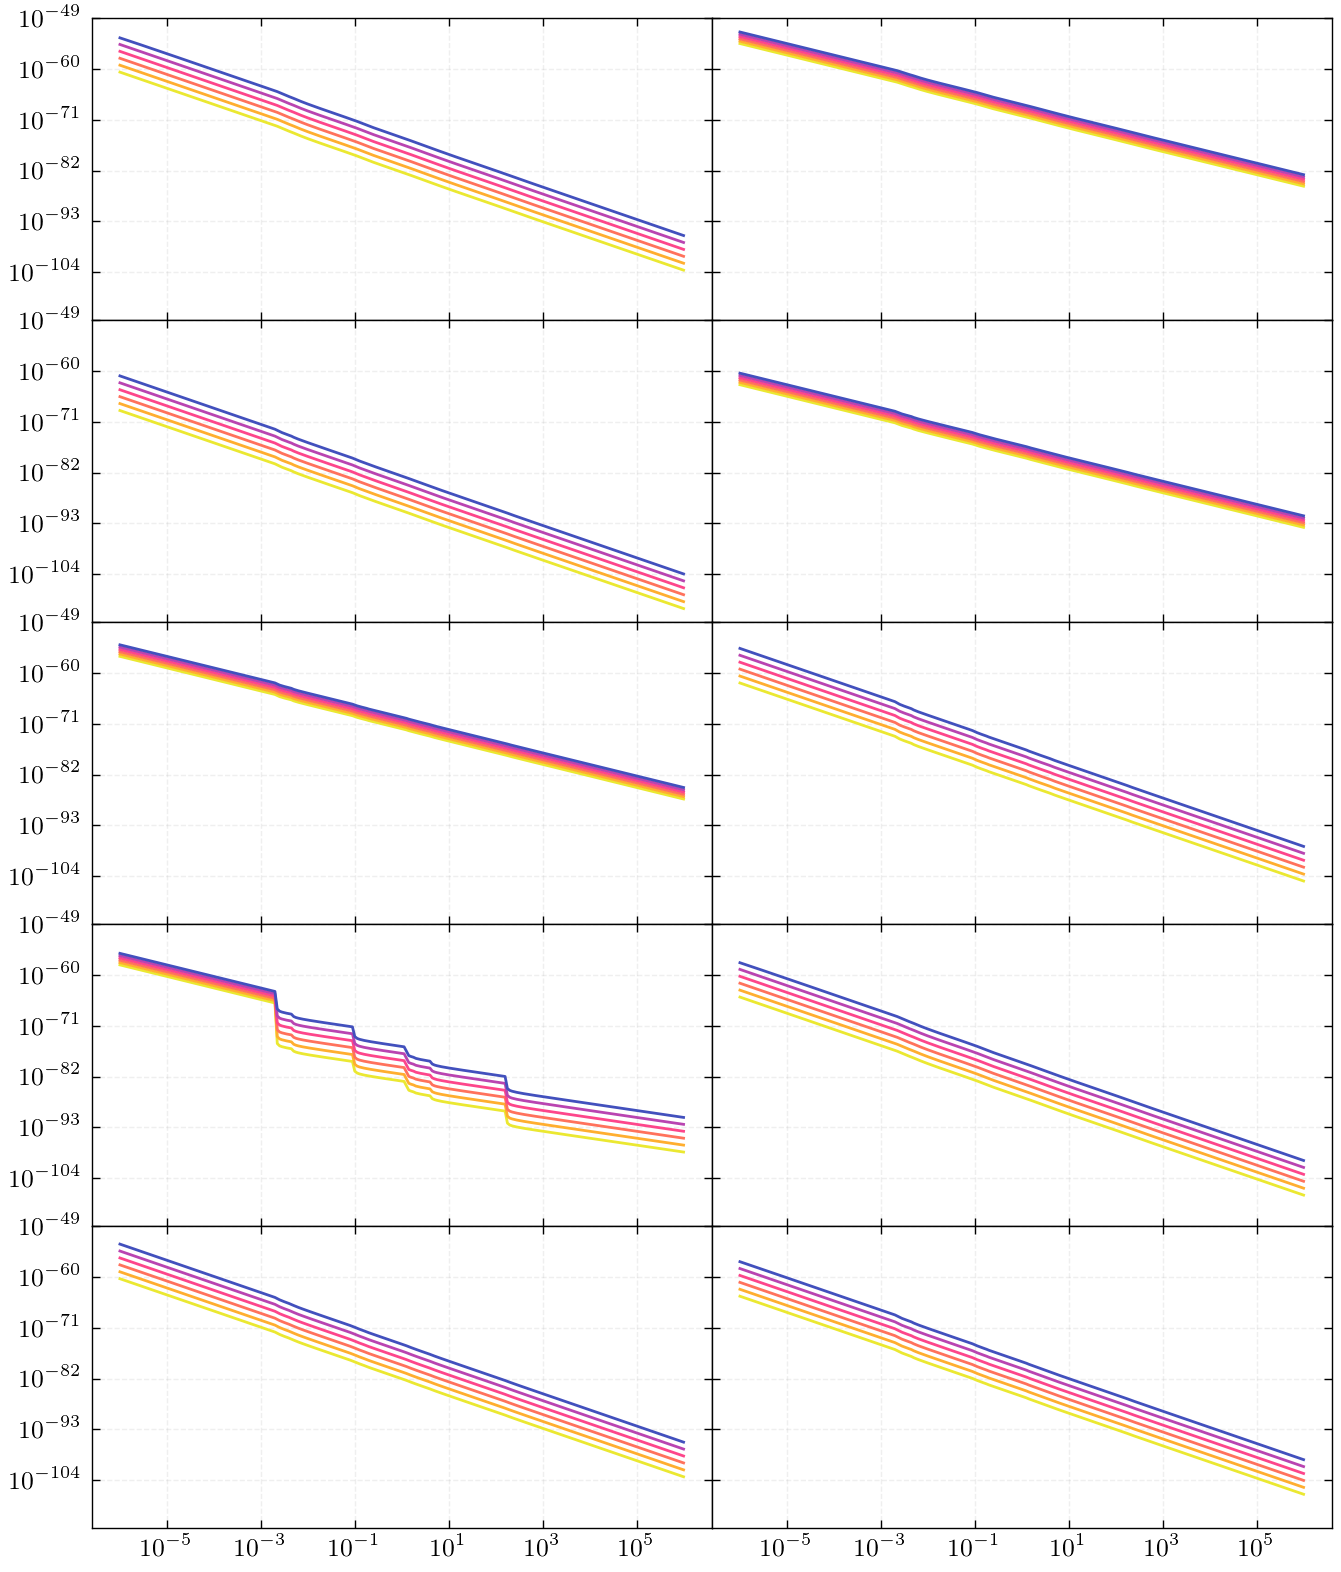

In [28]:
ann_plots()